In [1]:
pip install mglearn

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [3]:
import mglearn
import matplotlib.pyplot as plt

**k-최근접 이웃**

**k-최근접 이웃 분류 : 알고리즘이 훈련 테이터 셋에 가장 가까운 데이터 포인트를 찾음-> 최근접 이웃(nearest neighbors)**



**forge 데이터셋 분류 예 -> forge데이터셋에 대한 1최근접 이웃 모델의  예측**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
findfont: Font family ['NanumBarunGtothic'] not found. Falling back to DejaVu Sans.


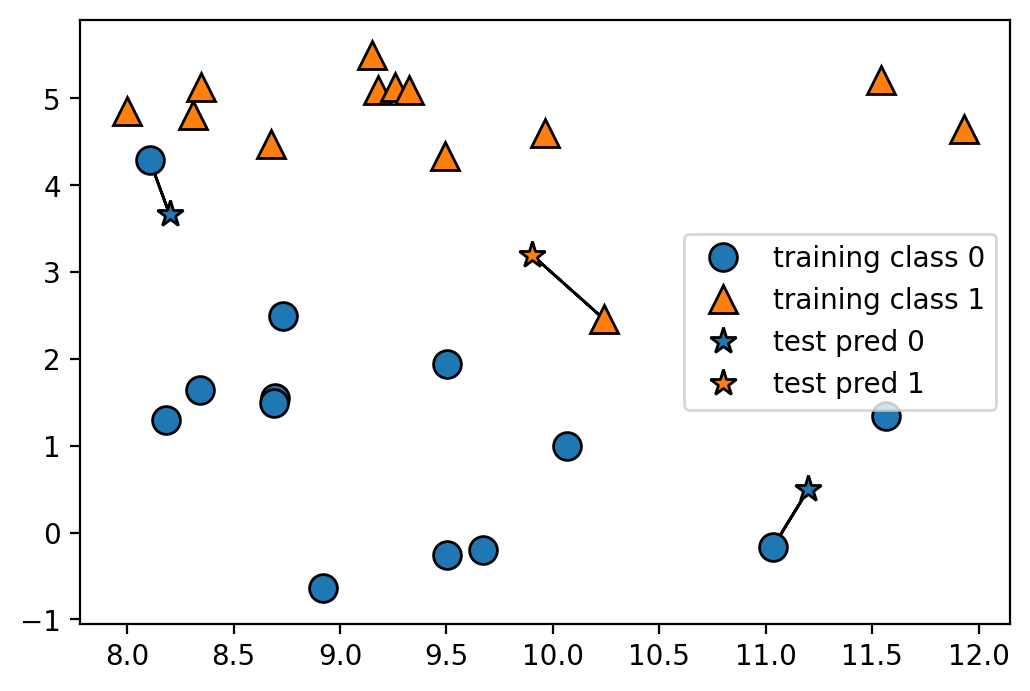

In [4]:
plt.figure(dpi  =  100)
plt.rc('font',family = 'NanumBarunGtothic')

mglearn.plots.plot_knn_classification(n_neighbors =1) # 제일 근접한 1개 이웃 선택

**forge 데이터셋 분류 예 -> forge데이터셋에 대한 3최근접 이웃 모델의  예측**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


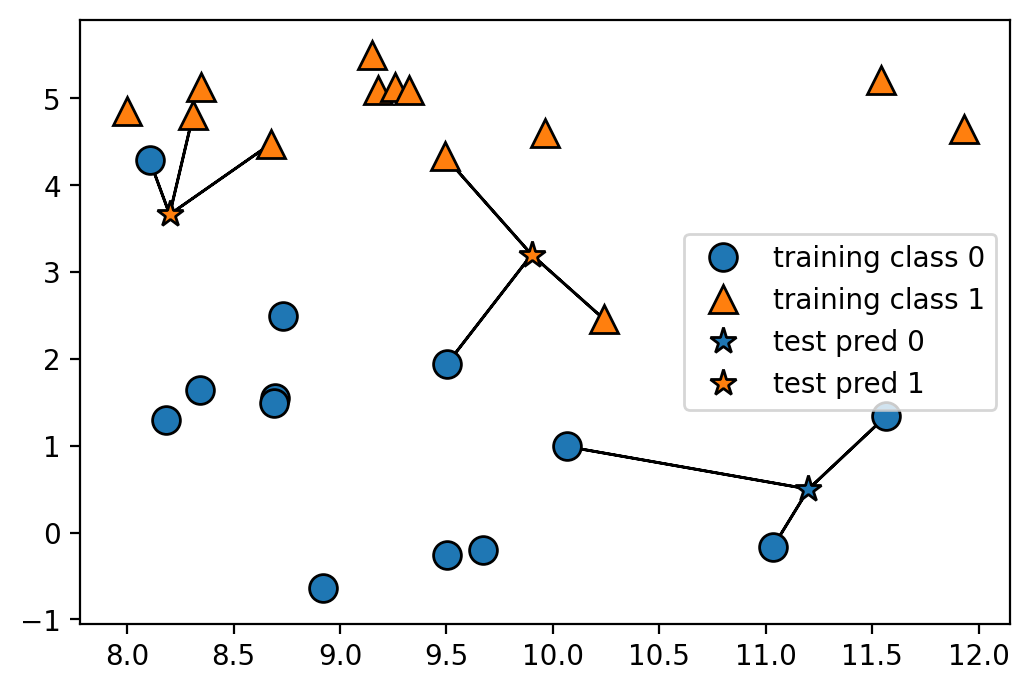

In [5]:
plt.figure(dpi  =  100)
plt.rc('font',family = 'NanumBarunGtothic')

mglearn.plots.plot_knn_classification(n_neighbors =3)# 제일 근접한 3개 이웃 선택

**분류 문제정의 : forge 데이터 셋을 사용한 이진 분류(label,1) 예측하기<br>**
**k-최근접 이웃 알고리즘 적용하여 예측하고 평가하기**

**데이터 준비하기**

In [6]:
X,y = mglearn.datasets.make_forge()# x: 데이터(feature), y : 레이블(label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [7]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [14]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

**일반화 성늘을 평가할 수 있도록 데이터 분리(교차검증)  -> 훈련세트(trainset) 테스트세트(testset)**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 7)

**KNeighborsClassifier를 입포트하고 객체 생성**

In [9]:
from sklearn.neighbors import  KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3) # 이웃의 수 3개 지정

**훈련세트를 사용하여 모델 학습**

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**테스트 데이터에 대해 predict 메서드를 호출해서 예측**

**테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산 -> 다음 가장 많은 클래스 찾기 -> 예측**

In [11]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

**모델이 얼마나 잘 일반화 되었는지 평가-> 정확도**

**score() 함수 사용 -> 테스트 데이터와 데스트 레이블을 넣어 호출**

In [12]:
clf.score(X_test,y_test)  * 100

85.71428571428571

In [13]:
clf.score(X_train,y_train) * 100

94.73684210526315

**KNeighborsClassifier 분석**


*   이웃을 하나 선택 했을떄는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
*  이웃의 수를 늘릴수록 결정 경계 더 부드러워짐
* 부드러운 경계는 더 단순한 모델을 의미



findfont: Font family ['NanumBarunGtothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/back

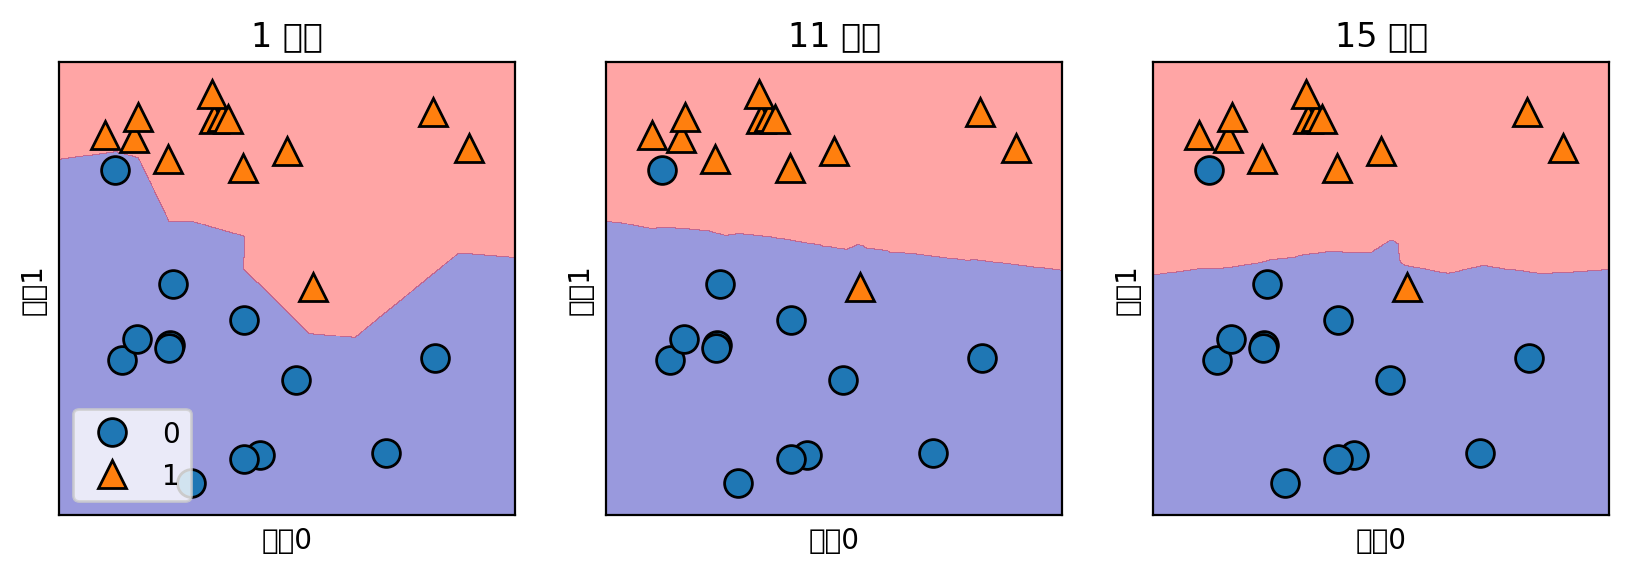

In [14]:
fig, axes = plt.subplots(1,3, figsize =(10,3), dpi = 100) #subplots 여러개의 플랏을 그릴수있다. # axes 차트의 객체를 담는다

for n_neighbors, ax in zip([1,11,15], axes) :  #이웃을 1,3,9, 일때의 결정 경계(decision boundary)

    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)

# 2차원 데이터셋 분할 평면 그리기mglearn.plots.plot_2d_separator (model 객체, train 데이터, 평면 칠하기, 투명도)

    mglearn.plots.plot_2d_separator(clf,X,fill = True, eps = 0.5, ax= ax, alpha =.4) # 결정경계그리기
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) # 2차원 산점도의 데이터셋 그리기 위해 

    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")

axes[0].legend(loc=3)
plt.show()

**이웃의 수(결정경계)에 따른 성능평가**

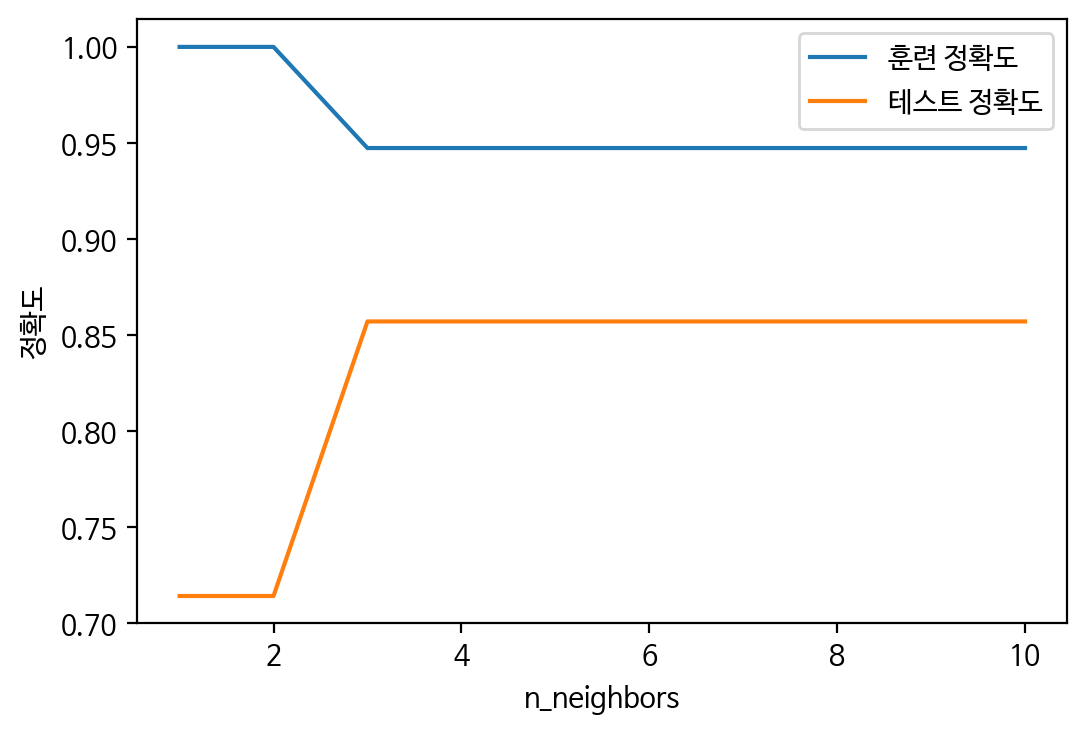

In [15]:
#이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy =[]

#1에서 10까지 n_neighbors를 적

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :

    #모델 생성
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train,y_train)

    #훈련세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))

    #테스트 세트 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbors_settings,train_accuracy, label = '훈련 정확도')

plt.plot(neighbors_settings,test_accuracy, label = '테스트 정확도')

plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

**유방암 데이터셋을 사용하여 이웃의 수(결정경계)에 따른 성능 평가**

**데이터 준비하기**

In [20]:
from sklearn.datasets import  load_breast_cancer

cancer = load_breast_cancer() # 데이터 다운로드

**데이터셋 분리하기(훈련셋,테스트셋)**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=77  # stratify = cancer.target 결과 비율과 비슷하게 잘라줘
)



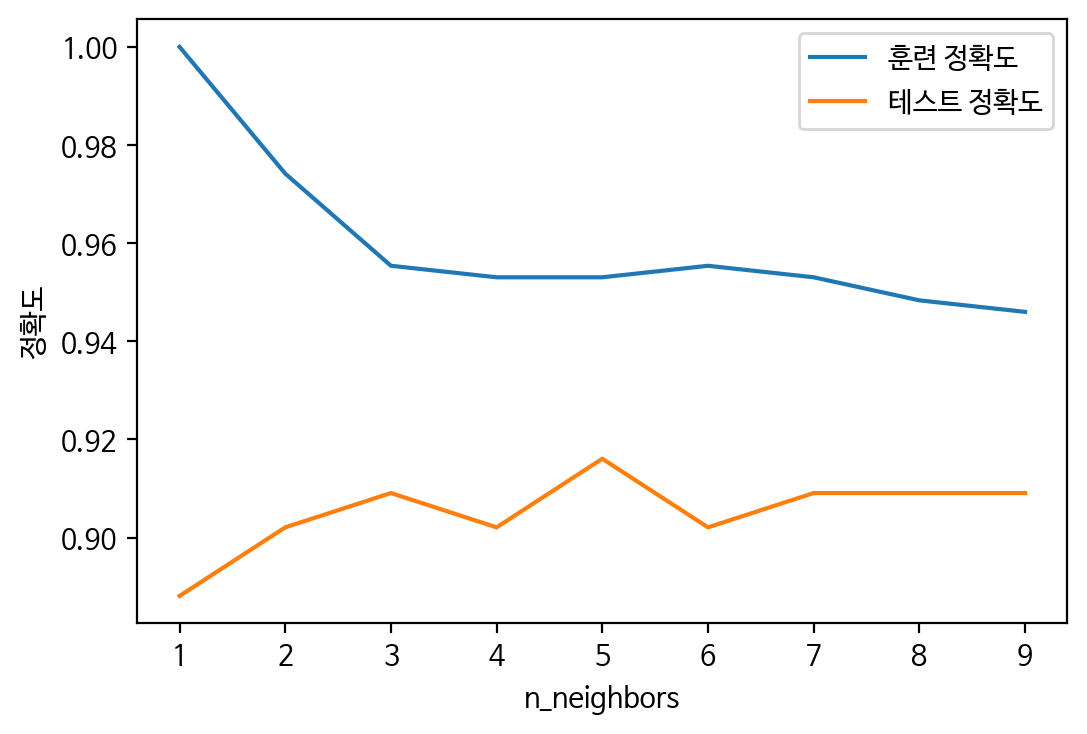

In [34]:
#이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy =[]

#1에서 10까지 n_neighbors를 적

neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings :

    #모델 생성
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train ,y_train)

    #훈련세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))

    #테스트 세트 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbors_settings,train_accuracy, label = '훈련 정확도')

plt.plot(neighbors_settings,test_accuracy, label = '테스트 정확도')

plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

서능평가 - roc 커브

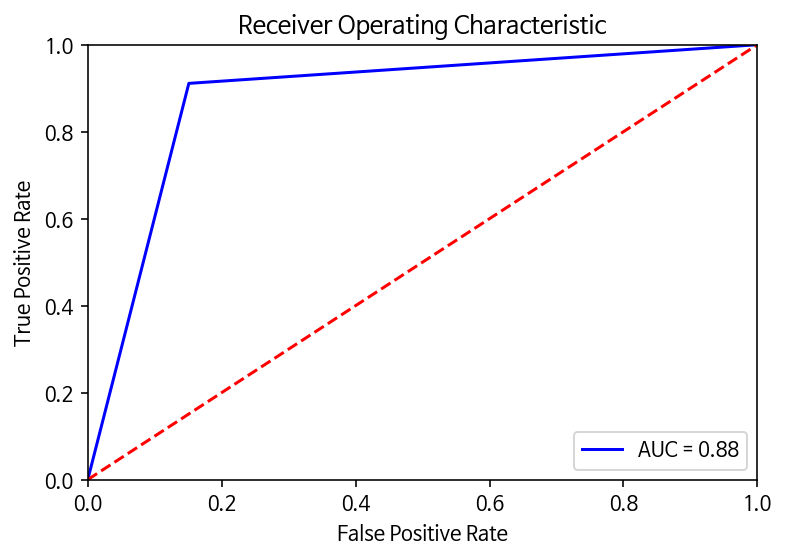

In [38]:

#Library for Analysing the ml model
from sklearn import metrics

# 모델 생성

clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr,tpr)

#method i :plt

plt.title('Receiver Operating Characteristic')
plt.plot(fqr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
#test data를 가지고 y_hat을 예측(분류)

y_hat = clf.predict(X_test)

#모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)

print(knn_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        53
           1       0.91      0.91      0.91        90

    accuracy                           0.89       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.89      0.89      0.89       143



In [42]:
#sklearn 을 이용하면 전부 계산해준다.
print('accuracy:' , metrics.balanced_accuracy_score(y_test,y_hat))
print('precision:' , metrics.precision_score(y_test, y_hat))
print('recall: ', metrics.recall_score(y_test,y_hat))
print('f1 :',metrics.f1_score(y_test,y_hat))

accuracy: 0.880083857442348
precision: 0.9111111111111111
recall:  0.9111111111111111
f1 : 0.9111111111111111


k-Neighbors Regression
* k=1 경우 그냥 가장 가까운 이웃의 타켓값
* k >=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값


wave 데이터셋을 사용하여 이웃의 수(결정경계)에 따라 성능 평가

데이터 셋 분리하기(훈련셋,테스트셋)

In [56]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.model_selection import  train_test_split

X,y = mglearn.datasets.make_wave(n_samples= 40)

# wave 데이터셋을 훈련세트와 테스트 세트로 나눔

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) # test size =0.25

**KNeighborsRegressor를 임포트하고 객체생성**

In [58]:

#이웃의 수는 3으로 하여 모델 객체를 생성
reg = KNeighborsRegressor(n_neighbors=3)

**훈련 세트를 사용하여 회귀 모델학습**

In [59]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

**성능평가 하기**

In [61]:
#score r- square 결정 계수 0~1 사이 값을 갖고, 관계가 높을 수록 1에 가까운 값을 갖음
#0에 가까울수록 데이터 분포를 제대로 표현하지 못한 것 
print("테스트 세트 R^2   : {:.2f}".format (reg.score(X_test, y_test)))

테스트 세트 R^2   : 0.83


KNeighborsRegressor분석

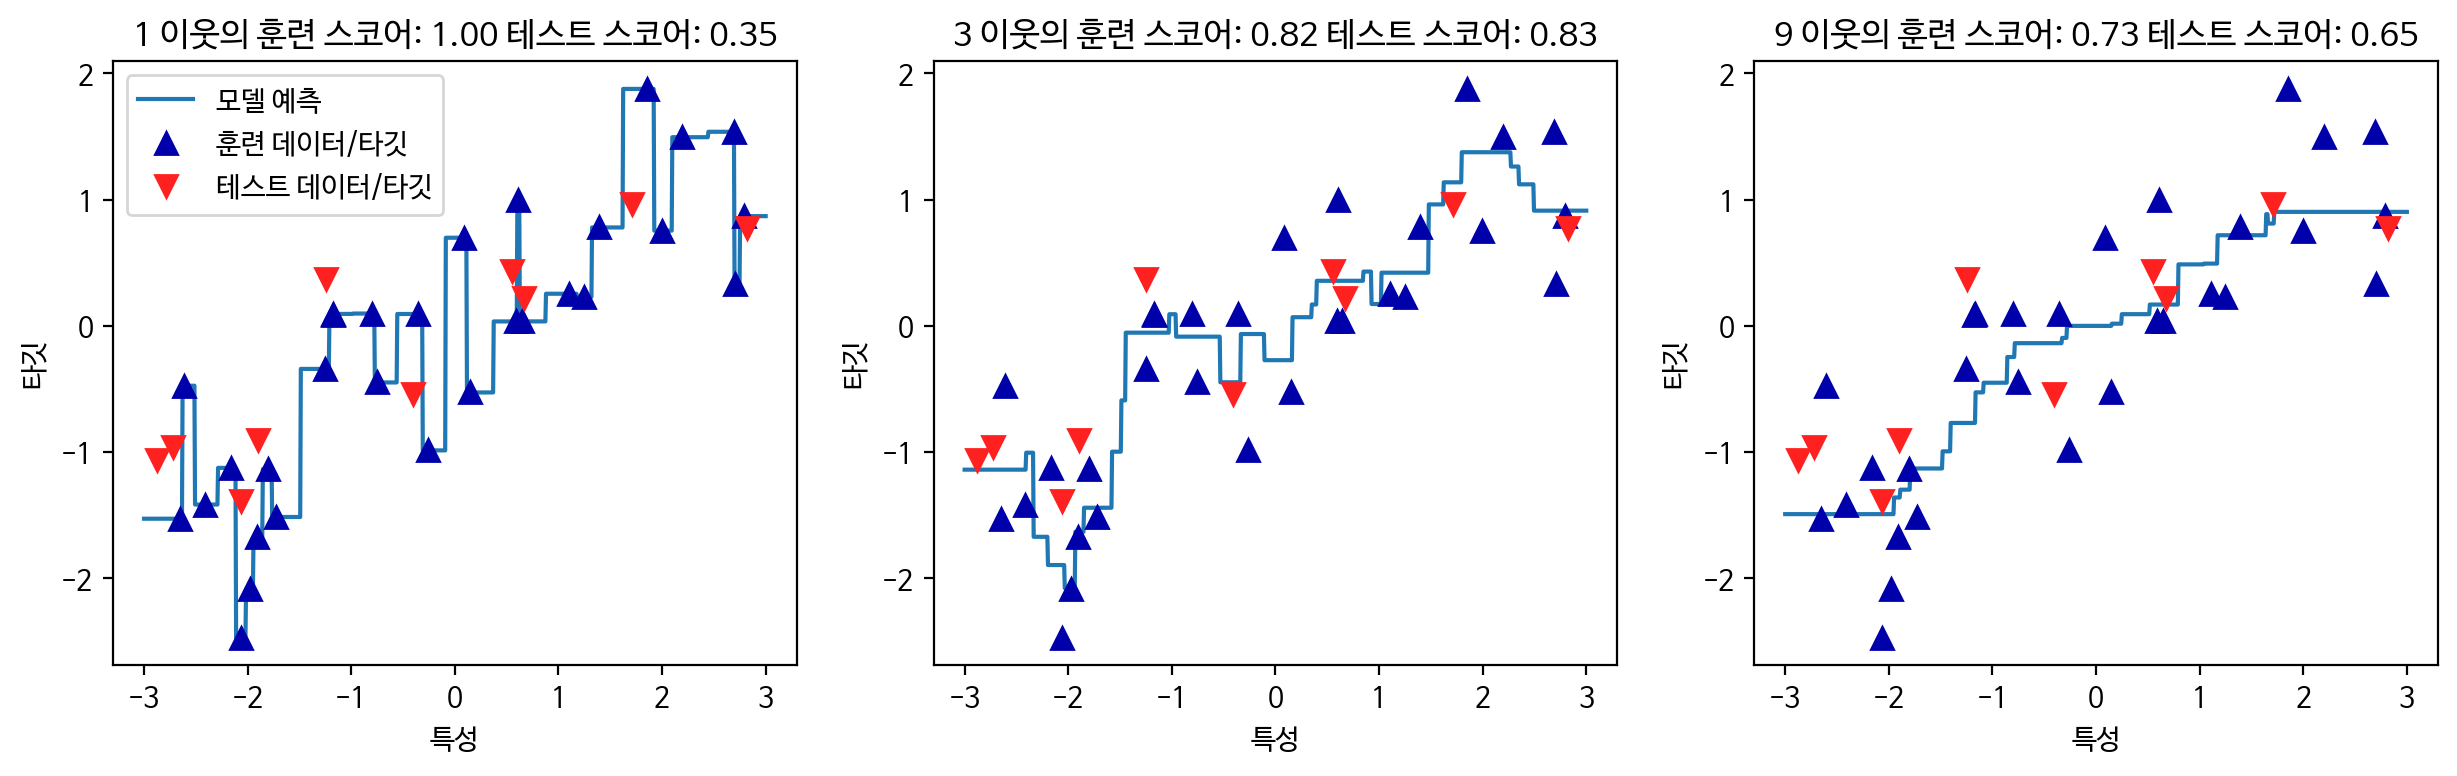

In [64]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()


**선형 모델 : 선형 함수를 만들어 예측 수행**




**선형 회귀 모델**

w[0]: 0.393906  b: -0.031804


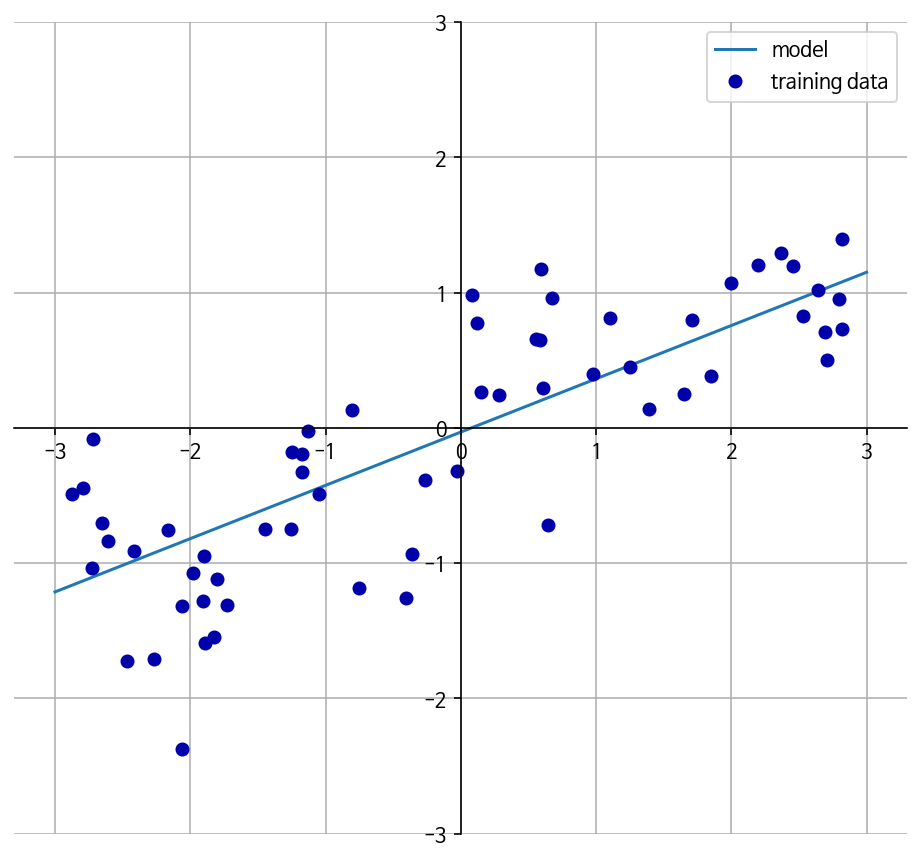

In [65]:
mglearn.plots.plot_linear_regression_wave()

**선형회귀(최소제곱법)**

**데이터 준비하기**

In [68]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state =42)

**선형모델 만든 후 학습 시키기**

In [70]:
lr = LinearRegression().fit(X_train,y_train)

**lr 객체 확인하기**

In [73]:
print('lr.coef_:',lr.coef_) # w 가중치, 기울기 
print('lr.intercept_:',lr.intercept_) # 절편 

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


**성능평가**

In [76]:
print("훈련세트점수:" ,lr.score(X_train,y_train))
print("테스트 세트 점수 : ",lr.score(X_test,y_test)) #훈련-테스트 세트의 점수가 비슷하고,  낮으면 과소 적합 된 상황 

훈련세트점수: 0.6700890315075756
테스트 세트 점수 :  0.65933685968637


**보스턴 주택가격 데이터셋을 사용한 회귀 성능 평가**

**데이터셋 분리하기**

In [81]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state =0)

**훈련 데이터셋으로 학습하기**

In [82]:
lr = LinearRegression().fit(X_train,y_train)

**성능 평가하기**

In [85]:
print("훈련세트점수:" ,lr.score(X_train,y_train))
print("테스트 세트 점수 : ",lr.score(X_test,y_test)) # 과대 적합상태 

훈련세트점수: 0.9520519609032727
테스트 세트 점수 :  0.607472195966557


**릿지 회귀 - > 규제를 통해서 과대적합 되지 않게 하기 위한 선형 모델**

**보스턴 주택가격 데이터 셋을 사용한 릿지 회귀 성능 평가**

In [87]:
from sklearn.linear_model import  Ridge

ridge = Ridge().fit(X_train,y_train) #alpha = 1.0

**성능평가**

In [90]:
print("훈련세트점수:" ,ridge.score(X_train,y_train))
print("테스트 세트 점수 : ",ridge.score(X_test,y_test))

훈련세트점수: 0.8857966585170941
테스트 세트 점수 :  0.7527683481744751


**alpha 매개변수를 통해 모델 설정**

In [93]:
#alpha 값만 조정하여 성능 평가
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련세트점수:" ,ridge10.score(X_train,y_train))
print("테스트 세트 점수 : ",ridge10.score(X_test,y_test))

훈련세트점수: 0.7882787115369614
테스트 세트 점수 :  0.6359411489177309


In [98]:
#alpha 값만 조정하여 성능 평가
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련세트점수:" ,ridge10.score(X_train,y_train))
print("테스트 세트 점수 : ",ridge10.score(X_test,y_test))

훈련세트점수: 0.9282273685001992
테스트 세트 점수 :  0.7722067936479818


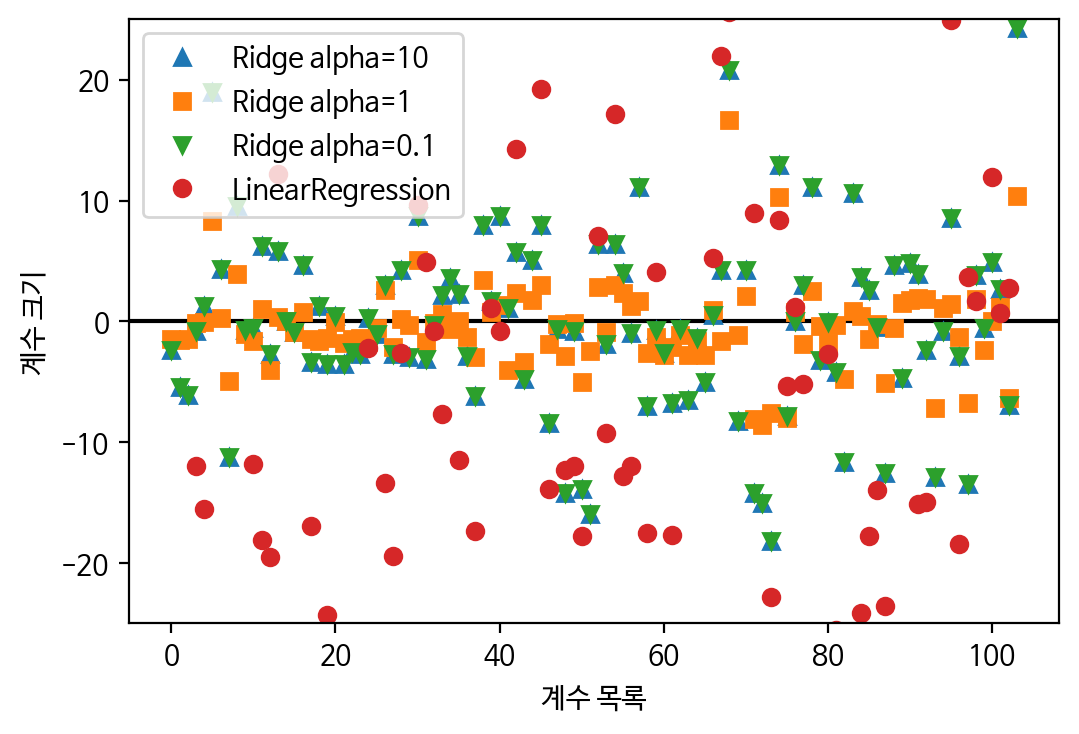

In [100]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 100)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()


**Lasso**

**확장된 보스턴 주택가격 데이터셋에 라쏘를 적용**

In [103]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("훈련세트점수:{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test,y_test))) # 과소적합상태
print("사용한 특성의 개수:", np.sum(lasso.coef_ !=0))

훈련세트점수:0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수: 4


**과소적합을 줄이기 위해서 alpha 값 설**

In [105]:
lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)
print("훈련세트점수:{:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test,y_test))) # 과소적합상태
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))

훈련세트점수:0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수: 32


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)
